In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import csv
import pandas as pandas
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
gun_violence_data = pandas.read_csv('gun_violence_data.csv')

# collect data from 10000 random rows (file is too large to render some of the plots)
sampled_data = gun_violence_data.sample(n = 10000)

In [3]:
sampled_data.head(50)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
97723,477873,2015-11-05,Missouri,Springfield,1700 block of E. Caravan Street,0,0,http://www.gunviolencearchive.org/incident/477873,http://www.news-leader.com/story/news/crime/20...,False,...,NaN,NaN,0::Male,0::Chris Behn,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.news-leader.com/story/news/crime/20...,131.0,30.0
197791,888504,2017-07-11,Florida,Ocala,300 Block of NW Ninth Ave,0,0,http://www.gunviolencearchive.org/incident/888504,http://www.ocala.com/news/20170712/police-shot...,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.ocala.com/news/20170712/police-shot...,20.0,8.0
71152,344692,2015-05-21,Illinois,Chicago,3100 block of West Lawrence Avenue,0,1,http://www.gunviolencearchive.org/incident/344692,http://www.dnainfo.com/chicago/20150522/albany...,False,...,0::20,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.dnainfo.com/chicago/20150522/albany...,40.0,20.0
94298,429621,2015-10-13,Illinois,Chicago,200 block of North Kenneth Avenue,0,1,http://www.gunviolencearchive.org/incident/429621,http://www.chicagotribune.com/news/local/break...,False,...,0::32,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.chicagotribune.com/news/local/break...,10.0,5.0
10157,117964,2014-03-22,Rhode Island,Providence,100 Canton Street,1,0,http://www.gunviolencearchive.org/incident/117964,http://wpri.com/2014/03/24/man-killed-in-polic...,False,...,0:18,0:Adult 18+,0:Male,0:Douglas Cooper,NaN,0:Killed,0:Victim,http://www.providencejournal.com/breaking-news...,7.0,1.0
187905,845945,2017-05-17,Louisiana,New Orleans,1200 Block of Feliciana St,1,0,http://www.gunviolencearchive.org/incident/845945,http://www.theadvocate.com/new_orleans/news/cr...,False,...,0::27,0::Adult 18+,0::Male,NaN,NaN,0::Killed,0::Victim,http://www.theadvocate.com/new_orleans/news/cr...,99.0,4.0
96513,438196,2015-10-28,South Carolina,Bluffton,39 Pinecrest Way,1,0,http://www.gunviolencearchive.org/incident/438196,http://m.wtoc.com/wtoc/db/350145/content/xPRkIWlS,False,...,0::33,0::Adult 18+,0::Male,0::Johnathan Cherol,NaN,0::Killed,0::Victim,http://m.wtoc.com/wtoc/db/350145/content/xPRkIWlS,118.0,46.0
185910,837987,2017-05-07,Alabama,Tuscaloosa,600 block of Paul W. Bryant Drive,1,0,http://www.gunviolencearchive.org/incident/837987,http://www.al.com/news/tuscaloosa/index.ssf/20...,False,...,0::23||1::26,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Branden Moss||1::Markis Russell,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.wmcactionnews5.com/story/35362199/u...,63.0,21.0
192617,867063,2017-06-12,South Carolina,Conway,Racepath Ave,0,0,http://www.gunviolencearchive.org/incident/867063,http://wpde.com/news/local/police-investigatin...,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://wpde.com/news/local/police-investigatin...,58.0,28.0
199670,896275,2017-07-22,New Jersey,Trenton,549 Brunswick Ave,0,1,http://www.gunviolencearchive.org/incident/896275,http://www.trentonian.com/general-news/2017072...,False,...,0::44,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.trentonian.com/general-news/2017072...,15.0,15.0


In [4]:
# Prints out total stats of the n=10,000 sample, including the number unharmed, the number injured,
# the number killed, the number arrested, and the total count of data we have for the 10,000 rows 
# (some of the data is missing, so count is less than 10,000)

unharmed = 0
injured = 0
killed = 0
arrested = 0

count = 0
for index, row in sampled_data.iterrows():

    status = row['participant_status']
    role = row['participant_type']
    if not pandas.isnull(status):
        count += 1
        status_array = status.split('||')
        role_array = role.split('||')

        for indiv_status, indiv_role in zip(status_array, role_array):
            # only counting the status of the suspect, not the victims
            if 'Subject-Suspect' in indiv_role:
                if 'Unharmed' in indiv_status:
                    unharmed += 1
                elif 'Injured' in indiv_status:
                    injured += 1
                elif 'Killed' in indiv_status:
                    killed += 1

                if 'Arrested' in indiv_status:
                    arrested += 1
                
print('unharmed: {}, injured: {}, killed: {}, arrested: {}\ncount: {}'.format(unharmed,injured,killed,arrested,count))

unharmed: 6732, injured: 339, killed: 313, arrested: 4085
count: 8781


In [5]:
# Source: https://lawcenter.giffords.org/scorecard/
# States with some of the strongest gun laws ('A' ratings)
ca = []
nj = []
ct = []
md = []
ma = []
ny = []
hi = []
strong_gun_laws = [ca, nj, ct, md, ma, ny, hi]

# States with some of the weakest gun laws ('F' ratings)
ms = []
wy = []
ida = [] # id is a reserved Python word
mo = []
az = []
ks = []
ak = []
ky = []
sd = []
ar = []
mt = []
wv = []
nd = []
al = []
me = []
ga = []
tx = []
weak_gun_laws = [ms, wy, ida, mo, az, ks, ak, ky, sd, ar, mt, wv, nd, al, me, ga, tx]


incidences = []

killed = []
injured = []

def populateLists():
    for index, row in sampled_data.iterrows():
        state = row['state']
        killed_amount = row['n_killed']
        injured_amount = row['n_injured']


        # I'm defining incidence rate as the number of those injured + number of those killed * 2
        # Multiplying the number killed by 2 to account for the severity of a death compared to an injury
        incidence = 2 * row['n_killed'] + row['n_injured']

        killed.append(killed_amount)
        injured.append(injured_amount)
        incidences.append(incidence)

        if state == 'California':
            ca.append(incidence)
        elif state == 'New Jersey':
            nj.append(incidence)
        elif state == 'Connecticut': 
            ct.append(incidence)
        elif state == 'Maryland':
            md.append(incidence)
        elif state == 'Massachusetts':
            ma.append(incidence)
        elif state == 'New York':
            ny.append(incidence)
        elif state == 'Hawaii':
            hi.append(incidence)
        elif state == 'Mississippi':
            ms.append(incidence)
        elif state == 'Wyoming':
            wy.append(incidence)
        elif state == 'Idaho':
            ida.append(incidence)
        elif state == 'Missouri':
            mo.append(incidence)
        elif state == 'Arizona':
            az.append(incidence)
        elif state == 'Kansas':
            ks.append(incidence)
        elif state == 'Alaska':
            ak.append(incidence)
        elif state == 'Kentuky':
            ky.append(incidence)
        elif state == 'South Dakota':
            sd.append(incidence)
        elif state == 'Arkansas':
            ar.append(incidence)
        elif state == 'Montana':
            mt.append(incidence)
        elif state == 'West Virginia':
            wv.append(incidence)
        elif state == 'North Dakota':
            nd.append(incidence)
        elif state == 'Alabama':
            al.append(incidence)
        elif state == 'Maine':
            me.append(incidence)
        elif state == 'Georgia':
            ga.append(incidence)
        elif state == 'Texas':
            tx.append(incidence)
    
    highest_incidence = max(sampled_data['n_killed'] + sampled_data['n_injured'])
    print('Max incidence (2*n_killed + n_injured):', highest_incidence)
    
    print('average incidence: ', np.average(incidences))
    print('Strict Gun Law States: ')
    strong_states = ['California', 'New Jersey', 'Connecticut', 'Maryland', 'Massachusetts', 'New York', "Hawaii"]
    for state_name, state in zip(strong_states, strong_gun_laws):
        if len(state) > 0:
            print(state_name, 'average:', np.average(state), 'variance:', np.var(state))
        else: 
            print(state_name, 'average: N/A variance: N/A')

    print()
    
    weak_states = ['Mississippi', 'Wyoming', 'Idaho', 'Missouri', 'Arizona', 'Kansas', 'Alaska', 'Kentucky', 'South Dakota', 'Arkansas', 'Montana', 'West Virginia', 'North Dakota', 'Alabama', 'Maine', 'Georgia', 'Texas']

    print('Weak Gun Law States: ')
    for state_name, state in zip(weak_states, weak_gun_laws):
        if len(state) > 0:
            print(state_name, 'average:', np.average(state), 'variance:', np.var(state))
        else: 
            print(state_name, 'average: N/A variance: N/A')
    
populateLists()

Max incidence (2*n_killed + n_injured): 13
average incidence:  0.987
Strict Gun Law States: 
California average: 1.1203438395415473 variance: 1.4754887069892695
New Jersey average: 0.8577586206896551 variance: 1.0875260107015456
Connecticut average: 0.734375 variance: 1.835693359375
Maryland average: 1.132841328413284 variance: 1.1041243991775709
Massachusetts average: 0.3939393939393939 variance: 0.6803095894004985
New York average: 0.8471177944862155 variance: 1.2322661289816017
Hawaii average: 0.6470588235294118 variance: 0.8166089965397925

Weak Gun Law States: 
Mississippi average: 1.0289855072463767 variance: 0.9991598403696703
Wyoming average: 0.38461538461538464 variance: 0.5443786982248521
Idaho average: 0.5833333333333334 variance: 0.9652777777777778
Missouri average: 1.0963455149501662 variance: 1.010651096566263
Arizona average: 1.3617021276595744 variance: 1.571299230421005
Kansas average: 0.9487179487179487 variance: 1.2024983563445104
Alaska average: 0.7166666666666667 v

In [6]:
# Defining a high incidence event as having a incidence rate greater than 1 (i.e. 1+ deaths or 2+ injuries)
def calculate_incidences():
    p_high_incidence = (len(incidences) - (incidences.count(0) + incidences.count(1))) / len(incidences)
    p_low_incidence = (incidences.count(0) + incidences.count(1)) / len(incidences)
    return p_high_incidence, p_low_incidence

In [7]:
# Calculating how large our samples are of strong gun law states and weak gun law states
def calculateSampleSizes():
    len_strong = 0
    for state in strong_gun_laws:
        len_strong += len(state)

    len_weak = 0
    for state in weak_gun_laws:
        len_weak += len(state)
    return len_strong, len_weak

In [8]:
# Calculating the number of 0/1 injuries of strong gun law states and weak gun law states
def calculateSums():
    sum_strong = 0
    sum_weak = 0

    for state in strong_gun_laws:
        sum_strong += state.count(0) + state.count(1)

    for state in weak_gun_laws:
        sum_weak += state.count(0) + state.count(1)
        
    return sum_strong, sum_weak

In [9]:
# Calculating the probability of having a state with weak gun laws/strong gun laws
def calculateGunStrengthProb():
    sum_strong, sum_weak = calculateSums()
    p_weak = sum_weak / (sum_weak + sum_strong)
    p_strong = sum_strong / (sum_strong + sum_weak)
    return p_weak, p_strong

In [10]:
# Calculating the intersection probabilities of high/low incidence and strong/weak gun law states
def calculateIntersectionProbs():
    len_strong, len_weak = calculateSampleSizes()
    sum_strong, sum_weak = calculateSums()
    
    p_high_incidence_and_strong = (len_strong - sum_strong) / len_strong
    p_high_incidence_and_weak = (len_weak - sum_weak) / len_weak
    p_low_incidence_and_strong = sum_strong / len_strong
    p_low_incidence_and_weak = sum_weak / len_weak
    return p_high_incidence_and_strong, p_high_incidence_and_weak, p_low_incidence_and_strong, p_low_incidence_and_weak

In [11]:
# Applying Bayes' Theorem
bayes_probs = []
def applyBayes():
    p_high_incidence, p_low_incidence = calculate_incidences()
    len_strong, len_weak = calculateSampleSizes()
    sum_strong, sum_weak = calculateSums()
    p_weak, p_strong = calculateGunStrengthProb()
    p_high_incidence_and_strong, p_high_incidence_and_weak, p_low_incidence_and_strong, p_low_incidence_and_weak = calculateIntersectionProbs()

    p_strong_given_high_incidence = (p_high_incidence_and_strong * p_strong) / p_high_incidence
    p_weak_given_high_incidence = (p_high_incidence_and_weak * p_weak) / p_high_incidence
    p_strong_given_low_incidence = (p_low_incidence_and_strong * p_strong) / p_low_incidence
    p_weak_given_low_incidence = (p_low_incidence_and_weak * p_weak) / p_low_incidence

    print('P(strong gun law state | high incidence):', p_strong_given_high_incidence, '\nP(weak gun law state | high incidence):', p_weak_given_high_incidence, '\nP(strong gun law state | low incidence):', p_strong_given_low_incidence, '\nP(weak gun law state | low incidence):', p_weak_given_low_incidence)
    bayes_probs.append([p_strong_given_high_incidence, p_weak_given_high_incidence, p_strong_given_low_incidence, p_weak_given_low_incidence])

In [12]:
def resetLists():
    ca.clear()
    nj.clear()
    ct.clear()
    md.clear()
    ma.clear()
    ny.clear()
    hi.clear()

    ms.clear()
    wy.clear()
    ida.clear()
    mo.clear()
    az.clear()
    ks.clear()
    ak.clear()
    ky.clear()
    sd.clear()
    ar.clear()
    mt.clear()
    wv.clear()
    nd.clear()
    al.clear()
    me.clear()
    ga.clear()
    tx.clear()
    
    incidences.clear()
    killed.clear()
    injured.clear()
    strong_gun_laws = [ca, nj, ct, md, ma, ny, hi]
    weak_gun_laws = [ms, wy, ida, mo, az, ks, ak, ky, sd, ar, mt, wv, nd, al, me, ga, tx]


In [13]:
for i in range(100):
    print('-----------------------------------Trial #{}-----------------------------------'.format(i + 1))
    sampled_data = gun_violence_data.sample(n = 10000)
    populateLists()
    print()
    applyBayes()
    print()
    resetLists()

-----------------------------------Trial #1-----------------------------------
Max incidence (2*n_killed + n_injured): 12
average incidence:  0.97445
Strict Gun Law States: 
California average: 1.1616458486407053 variance: 1.5506523977215612
New Jersey average: 0.8533604887983707 variance: 1.127173024833977
Connecticut average: 0.6417322834645669 variance: 1.3086521173042347
Maryland average: 1.1381322957198443 variance: 1.0840323093460917
Massachusetts average: 0.3948919449901768 variance: 0.5729405089527986
New York average: 0.8320987654320988 variance: 1.1199573235787228
Hawaii average: 0.6774193548387096 variance: 0.7346514047866806

Weak Gun Law States: 
Mississippi average: 1.1379310344827587 variance: 1.084423305588585
Wyoming average: 0.3469387755102041 variance: 0.4714702207413578
Idaho average: 0.8103448275862069 variance: 1.360582639714625
Missouri average: 1.128440366972477 variance: 1.1835030721319755
Arizona average: 1.4101123595505618 variance: 1.4554033581618482
Kansas 

Max incidence (2*n_killed + n_injured): 8
average incidence:  0.9897
Strict Gun Law States: 
California average: 1.0919003115264798 variance: 1.5289375103114295
New Jersey average: 1.032258064516129 variance: 1.5611713988404934
Connecticut average: 0.5040650406504065 variance: 0.5264062396721527
Maryland average: 1.216867469879518 variance: 1.1497556491024337
Massachusetts average: 0.396078431372549 variance: 0.5372395232602846
New York average: 0.912751677852349 variance: 0.9521192739065808
Hawaii average: 1.0 variance: 1.25

Weak Gun Law States: 
Mississippi average: 1.391812865497076 variance: 1.5365411579631338
Wyoming average: 0.3333333333333333 variance: 0.5079365079365079
Idaho average: 0.625 variance: 0.6510416666666666
Missouri average: 1.24 variance: 1.3824
Arizona average: 1.6022727272727273 variance: 2.17135847107438
Kansas average: 0.7530864197530864 variance: 1.4205151653711323
Alaska average: 0.5106382978723404 variance: 0.8456315074694433
Kentucky average: N/A variance:

Max incidence (2*n_killed + n_injured): 13
average incidence:  0.9939
Strict Gun Law States: 
California average: 1.0935143288084463 variance: 1.200908162313539
New Jersey average: 0.9173913043478261 variance: 0.78882797731569
Connecticut average: 0.568 variance: 0.741376
Maryland average: 1.2955465587044535 variance: 1.6575915028930162
Massachusetts average: 0.4125 variance: 0.64234375
New York average: 0.9240196078431373 variance: 1.2074622741253365
Hawaii average: 0.2222222222222222 variance: 0.1728395061728395

Weak Gun Law States: 
Mississippi average: 1.2244897959183674 variance: 1.1128696376509786
Wyoming average: 0.6428571428571429 variance: 1.3724489795918369
Idaho average: 0.4827586206896552 variance: 0.5945303210463732
Missouri average: 1.2013888888888888 variance: 1.3066647376543208
Arizona average: 1.4065934065934067 variance: 1.450066417099384
Kansas average: 0.9591836734693877 variance: 1.365680966264056
Alaska average: 0.4827586206896552 variance: 0.629013079667063
Kent

Max incidence (2*n_killed + n_injured): 14
average incidence:  1.0066
Strict Gun Law States: 
California average: 1.1811377245508983 variance: 1.495632238516978
New Jersey average: 0.9121951219512195 variance: 0.9776561570493755
Connecticut average: 0.5905511811023622 variance: 0.7457374914749832
Maryland average: 1.1288888888888888 variance: 1.214498765432099
Massachusetts average: 0.40784313725490196 variance: 0.5709188773548637
New York average: 0.9366754617414248 variance: 1.1622169157830982
Hawaii average: 0.5714285714285714 variance: 1.102040816326531

Weak Gun Law States: 
Mississippi average: 1.096551724137931 variance: 1.7286087990487513
Wyoming average: 0.2631578947368421 variance: 0.40443213296398894
Idaho average: 0.8666666666666667 variance: 1.4488888888888884
Missouri average: 1.1751824817518248 variance: 1.3488731418828919
Arizona average: 1.6082474226804124 variance: 2.0527154851737697
Kansas average: 1.0294117647058822 variance: 1.5383506343713953
Alaska average: 0.783

Max incidence (2*n_killed + n_injured): 12
average incidence:  0.9955
Strict Gun Law States: 
California average: 1.0597243491577335 variance: 1.3547790970640865
New Jersey average: 1.0 variance: 1.2072072072072073
Connecticut average: 0.5928571428571429 variance: 0.7270918367346939
Maryland average: 1.1294642857142858 variance: 1.1930604272959184
Massachusetts average: 0.42738589211618255 variance: 0.6098724195520051
New York average: 0.8762376237623762 variance: 1.1232967356141554
Hawaii average: 0.375 variance: 0.484375

Weak Gun Law States: 
Mississippi average: 1.1944444444444444 variance: 1.5177469135802468
Wyoming average: 0.5789473684210527 variance: 1.2963988919667586
Idaho average: 0.8235294117647058 variance: 1.3217993079584778
Missouri average: 1.1390977443609023 variance: 1.3829074566114534
Arizona average: 1.3076923076923077 variance: 1.71301775147929
Kansas average: 1.2894736842105263 variance: 2.2319944598337944
Alaska average: 0.7777777777777778 variance: 1.78395061728

Max incidence (2*n_killed + n_injured): 34
average incidence:  0.9943
Strict Gun Law States: 
California average: 1.1454823889739663 variance: 1.3096158852181825
New Jersey average: 1.0220264317180616 variance: 1.387180034543655
Connecticut average: 0.6347826086956522 variance: 0.7709640831758033
Maryland average: 1.2078431372549019 variance: 1.0117031910803538
Massachusetts average: 0.36885245901639346 variance: 0.4541117979037893
New York average: 0.9328165374677002 variance: 0.9877344443776748
Hawaii average: 0.7272727272727273 variance: 0.9256198347107436

Weak Gun Law States: 
Mississippi average: 1.2364864864864864 variance: 1.16704711468225
Wyoming average: 0.30434782608695654 variance: 0.559546313799622
Idaho average: 1.2272727272727273 variance: 2.357438016528925
Missouri average: 1.0959409594095941 variance: 1.2232676570308139
Arizona average: 1.3368421052631578 variance: 1.444432132963988
Kansas average: 1.1818181818181819 variance: 2.694214876033058
Alaska average: 0.666666

Max incidence (2*n_killed + n_injured): 27
average incidence:  0.9676
Strict Gun Law States: 
California average: 1.0718562874251496 variance: 1.345136075155079
New Jersey average: 0.8355555555555556 variance: 1.2751802469135802
Connecticut average: 0.5495495495495496 variance: 0.6979952925898868
Maryland average: 0.9462809917355371 variance: 1.0012464995560413
Massachusetts average: 0.39344262295081966 variance: 0.4845471647406612
New York average: 0.889168765743073 variance: 0.9952731125760584
Hawaii average: 1.2222222222222223 variance: 1.5061728395061729

Weak Gun Law States: 
Mississippi average: 1.0738255033557047 variance: 0.9811269762623303
Wyoming average: 0.36666666666666664 variance: 0.4988888888888888
Idaho average: 1.36 variance: 2.7104000000000004
Missouri average: 1.098901098901099 variance: 1.3345409169584994
Arizona average: 1.2346938775510203 variance: 1.444918783840067
Kansas average: 0.9397590361445783 variance: 1.116852953984613
Alaska average: 0.44 variance: 0.726

Max incidence (2*n_killed + n_injured): 13
average incidence:  1.0054
Strict Gun Law States: 
California average: 1.132047477744807 variance: 1.610159902790374
New Jersey average: 0.8756218905472637 variance: 1.4919927724561275
Connecticut average: 0.6259541984732825 variance: 1.3028378299632888
Maryland average: 1.1924686192468619 variance: 1.159608550270478
Massachusetts average: 0.44 variance: 0.7104000000000001
New York average: 0.919431279620853 variance: 1.0788167381685048
Hawaii average: 0.6875 variance: 0.71484375

Weak Gun Law States: 
Mississippi average: 1.0440251572327044 variance: 0.8722756220086229
Wyoming average: 0.38095238095238093 variance: 0.5215419501133787
Idaho average: 0.9583333333333334 variance: 1.873263888888889
Missouri average: 1.224264705882353 variance: 1.4974994593425606
Arizona average: 1.3516483516483517 variance: 2.601618162057722
Kansas average: 0.8651685393258427 variance: 1.1503598030551698
Alaska average: 0.673469387755102 variance: 0.9137859225322

Max incidence (2*n_killed + n_injured): 20
average incidence:  1.0095
Strict Gun Law States: 
California average: 1.1948424068767909 variance: 1.3803745453649805
New Jersey average: 0.8834080717488789 variance: 0.9639847976030083
Connecticut average: 0.616 variance: 0.5565440000000001
Maryland average: 1.1145038167938932 variance: 1.3609346774663482
Massachusetts average: 0.45416666666666666 variance: 0.7978993055555555
New York average: 0.8792270531400966 variance: 1.2172979532777894
Hawaii average: 0.23529411764705882 variance: 0.17993079584775085

Weak Gun Law States: 
Mississippi average: 1.108974358974359 variance: 1.3022271531886918
Wyoming average: 0.40625 variance: 0.6162109375
Idaho average: 0.7222222222222222 variance: 1.256172839506173
Missouri average: 1.2226277372262773 variance: 1.6256193723693324
Arizona average: 1.3396226415094339 variance: 1.5072979708081162
Kansas average: 0.9591836734693877 variance: 1.263640149937526
Alaska average: 0.6888888888888889 variance: 0.92

Max incidence (2*n_killed + n_injured): 19
average incidence:  1.0132
Strict Gun Law States: 
California average: 1.2164502164502164 variance: 1.9012012518506025
New Jersey average: 0.8978723404255319 variance: 1.129995473064735
Connecticut average: 0.5968992248062015 variance: 0.7212306952707169
Maryland average: 1.1565217391304348 variance: 1.0885444234404538
Massachusetts average: 0.44396551724137934 variance: 0.5744463436385254
New York average: 0.8656330749354005 variance: 0.8036509558052735
Hawaii average: 1.0769230769230769 variance: 2.378698224852071

Weak Gun Law States: 
Mississippi average: 1.218543046357616 variance: 3.0846892680145617
Wyoming average: 0.5 variance: 1.1388888888888888
Idaho average: 0.7368421052631579 variance: 0.8254847645429362
Missouri average: 1.197080291970803 variance: 1.3261228621663381
Arizona average: 1.5853658536585367 variance: 1.9744199881023201
Kansas average: 0.8681318681318682 variance: 0.88370969689651
Alaska average: 0.46875 variance: 0.592

Max incidence (2*n_killed + n_injured): 19
average incidence:  0.9875
Strict Gun Law States: 
California average: 1.0394922425952045 variance: 1.3919523514913037
New Jersey average: 0.8465116279069768 variance: 1.0043482963764194
Connecticut average: 0.635593220338983 variance: 0.9095805802930192
Maryland average: 1.1714285714285715 variance: 1.4372789115646258
Massachusetts average: 0.4015748031496063 variance: 0.5159030318060636
New York average: 0.8403141361256544 variance: 0.987589430114306
Hawaii average: 0.46153846153846156 variance: 0.7100591715976332

Weak Gun Law States: 
Mississippi average: 1.013157894736842 variance: 0.9735110803324099
Wyoming average: 0.5 variance: 0.7954545454545454
Idaho average: 0.8636363636363636 variance: 2.208677685950413
Missouri average: 1.1220472440944882 variance: 1.2331359662719328
Arizona average: 1.3663366336633664 variance: 1.5390647975688658
Kansas average: 1.125 variance: 7.081597222222222
Alaska average: 0.6417910447761194 variance: 0.8866

Max incidence (2*n_killed + n_injured): 9
average incidence:  0.9745
Strict Gun Law States: 
California average: 1.1469265367316341 variance: 1.5106464758625184
New Jersey average: 0.6778846153846154 variance: 0.9202801405325445
Connecticut average: 0.49635036496350365 variance: 0.49816186264585216
Maryland average: 1.094488188976378 variance: 1.3690247380494764
Massachusetts average: 0.45054945054945056 variance: 0.569898965503361
New York average: 0.8140703517587939 variance: 0.8699527789702278
Hawaii average: 0.7777777777777778 variance: 0.7283950617283952

Weak Gun Law States: 
Mississippi average: 1.1920529801324504 variance: 1.2942414806368143
Wyoming average: 0.34782608695652173 variance: 0.48771266540642705
Idaho average: 0.7037037037037037 variance: 1.3936899862825791
Missouri average: 1.2736486486486487 variance: 2.1582245252008763
Arizona average: 1.2840909090909092 variance: 1.521565082644628
Kansas average: 0.7857142857142857 variance: 1.1479591836734695
Alaska average: 0.

Max incidence (2*n_killed + n_injured): 8
average incidence:  1.0016
Strict Gun Law States: 
California average: 1.1785195936139332 variance: 1.577709854841054
New Jersey average: 0.9113924050632911 variance: 1.2453132510815574
Connecticut average: 0.7073170731707317 variance: 0.8736862978385883
Maryland average: 1.0468085106382978 variance: 0.9637664101403352
Massachusetts average: 0.3879003558718861 variance: 0.5861881181849268
New York average: 0.9422632794457275 variance: 1.2599459168271205
Hawaii average: 1.0 variance: 1.75

Weak Gun Law States: 
Mississippi average: 1.0675675675675675 variance: 1.0494886778670562
Wyoming average: 0.25 variance: 0.3875
Idaho average: 0.5769230769230769 variance: 1.0133136094674557
Missouri average: 1.2846715328467153 variance: 2.1014438702115186
Arizona average: 1.3846153846153846 variance: 1.2916314454775997
Kansas average: 1.0694444444444444 variance: 1.675733024691358
Alaska average: 0.7183098591549296 variance: 1.1882562983535014
Kentucky aver

Max incidence (2*n_killed + n_injured): 13
average incidence:  0.9717
Strict Gun Law States: 
California average: 1.121167883211679 variance: 1.5196249134210664
New Jersey average: 0.8027522935779816 variance: 1.0207263698341893
Connecticut average: 0.7404580152671756 variance: 1.2456150573975875
Maryland average: 1.1535714285714285 variance: 1.1085586734693875
Massachusetts average: 0.43333333333333335 variance: 0.638148148148148
New York average: 0.9070904645476773 variance: 0.959582977146239
Hawaii average: 0.5333333333333333 variance: 0.6488888888888891

Weak Gun Law States: 
Mississippi average: 1.1125 variance: 0.9373437499999999
Wyoming average: 0.5217391304347826 variance: 0.7712665406427222
Idaho average: 0.7647058823529411 variance: 0.7681660899653978
Missouri average: 1.2035714285714285 variance: 1.2264158163265306
Arizona average: 1.353448275862069 variance: 1.5216260404280613
Kansas average: 1.101123595505618 variance: 1.551571771241005
Alaska average: 0.3888888888888889 v

Max incidence (2*n_killed + n_injured): 12
average incidence:  0.9825
Strict Gun Law States: 
California average: 1.0957446808510638 variance: 1.375331436331889
New Jersey average: 0.8666666666666667 variance: 1.102222222222222
Connecticut average: 0.5797101449275363 variance: 0.6929216551144718
Maryland average: 1.255813953488372 variance: 1.2833964305029746
Massachusetts average: 0.41796875 variance: 0.5948333740234375
New York average: 0.855 variance: 0.973975
Hawaii average: 0.9411764705882353 variance: 1.231833910034602

Weak Gun Law States: 
Mississippi average: 1.1 variance: 0.9300000000000002
Wyoming average: 0.7619047619047619 variance: 1.1337868480725621
Idaho average: 0.6842105263157895 variance: 1.1634349030470912
Missouri average: 1.093984962406015 variance: 1.273121714059585
Arizona average: 1.4519230769230769 variance: 2.3630732248520707
Kansas average: 0.8222222222222222 variance: 0.9906172839506172
Alaska average: 0.6753246753246753 variance: 0.9205599595209983
Kentuck

Max incidence (2*n_killed + n_injured): 16
average incidence:  0.9894
Strict Gun Law States: 
California average: 1.1715610510046368 variance: 1.6228079186066233
New Jersey average: 0.8899521531100478 variance: 1.1218607632609143
Connecticut average: 0.704 variance: 1.8883840000000005
Maryland average: 1.0588235294117647 variance: 0.9797330696984676
Massachusetts average: 0.358974358974359 variance: 0.42669296515450367
New York average: 0.7990314769975787 variance: 0.9160281176532665
Hawaii average: 1.75 variance: 3.1875

Weak Gun Law States: 
Mississippi average: 1.171270718232044 variance: 0.9817160648331859
Wyoming average: 0.16666666666666666 variance: 0.24999999999999994
Idaho average: 0.7916666666666666 variance: 1.2482638888888888
Missouri average: 1.1947565543071161 variance: 1.752332056839064
Arizona average: 1.5504587155963303 variance: 2.1006649271946807
Kansas average: 0.875 variance: 0.921875
Alaska average: 0.8723404255319149 variance: 1.1326392032593933
Kentucky average:

Max incidence (2*n_killed + n_injured): 10
average incidence:  0.9935
Strict Gun Law States: 
California average: 1.1736526946107784 variance: 1.4249345620136973
New Jersey average: 0.8723404255319149 variance: 0.9794477138976915
Connecticut average: 0.7407407407407407 variance: 0.9327846364883406
Maryland average: 1.055299539170507 variance: 0.9646838964514006
Massachusetts average: 0.39148936170212767 variance: 0.4680126754187414
New York average: 0.8494318181818182 variance: 0.8949428589876033
Hawaii average: 0.4117647058823529 variance: 0.35986159169550175

Weak Gun Law States: 
Mississippi average: 1.1655629139072847 variance: 1.3831849480285954
Wyoming average: 0.41935483870967744 variance: 0.8241415192507805
Idaho average: 0.36363636363636365 variance: 0.5041322314049586
Missouri average: 1.2092198581560283 variance: 1.2647376892510436
Arizona average: 1.3786407766990292 variance: 1.9051748515411442
Kansas average: 0.9080459770114943 variance: 1.4628088254723213
Alaska average: 

Max incidence (2*n_killed + n_injured): 103
average incidence:  1.0099
Strict Gun Law States: 
California average: 1.113846153846154 variance: 1.7470390532544378
New Jersey average: 0.8888888888888888 variance: 1.124406457739791
Connecticut average: 0.5238095238095238 variance: 0.8843537414965985
Maryland average: 1.1551724137931034 variance: 1.2086801426872773
Massachusetts average: 0.45217391304347826 variance: 0.7346691871455576
New York average: 0.8053097345132744 variance: 1.0151930456574516
Hawaii average: 1.2142857142857142 variance: 1.596938775510204

Weak Gun Law States: 
Mississippi average: 1.2272727272727273 variance: 0.9548406139315231
Wyoming average: 0.24 variance: 0.4224
Idaho average: 0.4642857142857143 variance: 0.6058673469387754
Missouri average: 1.1821428571428572 variance: 1.198966836734694
Arizona average: 1.3218390804597702 variance: 1.2757299511163958
Kansas average: 0.9397590361445783 variance: 1.6710698214544923
Alaska average: 0.5476190476190477 variance: 0.

Max incidence (2*n_killed + n_injured): 8
average incidence:  0.9957
Strict Gun Law States: 
California average: 1.145506419400856 variance: 1.5793984953225575
New Jersey average: 0.9177489177489178 variance: 1.2529750192087856
Connecticut average: 0.6015625 variance: 0.72406005859375
Maryland average: 1.125 variance: 1.1450892857142858
Massachusetts average: 0.4307116104868914 variance: 0.6721654112135113
New York average: 0.8631578947368421 variance: 1.27601108033241
Hawaii average: 0.6923076923076923 variance: 0.8284023668639052

Weak Gun Law States: 
Mississippi average: 1.3417721518987342 variance: 1.516103188591572
Wyoming average: 0.23809523809523808 variance: 0.27664399092970526
Idaho average: 0.6 variance: 0.72
Missouri average: 1.2170542635658914 variance: 1.1854455862027522
Arizona average: 1.5227272727272727 variance: 2.6813016528925626
Kansas average: 1.0344827586206897 variance: 1.8034086405073326
Alaska average: 0.8181818181818182 variance: 1.7331759149940962
Kentucky av

Max incidence (2*n_killed + n_injured): 13
average incidence:  1.0068
Strict Gun Law States: 
California average: 1.1818181818181819 variance: 1.696969696969697
New Jersey average: 1.0184331797235022 variance: 1.3084159782539446
Connecticut average: 0.6204379562043796 variance: 0.746443603814801
Maryland average: 1.111587982832618 variance: 0.8888356757354161
Massachusetts average: 0.5402298850574713 variance: 1.0299907517505613
New York average: 0.9166666666666666 variance: 1.3524305555555556
Hawaii average: 0.6111111111111112 variance: 0.6820987654320989

Weak Gun Law States: 
Mississippi average: 1.135483870967742 variance: 1.1622892819979187
Wyoming average: 0.37037037037037035 variance: 0.8257887517146777
Idaho average: 0.65 variance: 0.7274999999999999
Missouri average: 1.2045454545454546 variance: 1.4354338842975207
Arizona average: 1.6021505376344085 variance: 2.024511504220141
Kansas average: 0.9021739130434783 variance: 1.1752126654064272
Alaska average: 0.391304347826087 var

In [14]:
strong_given_high = []
weak_given_high = []
strong_given_low = []
weak_given_low = []
for trial in bayes_probs:
    strong_given_high.append(trial[0])
    weak_given_high.append(trial[1])
    strong_given_low.append(trial[2])
    weak_given_low.append(trial[3])

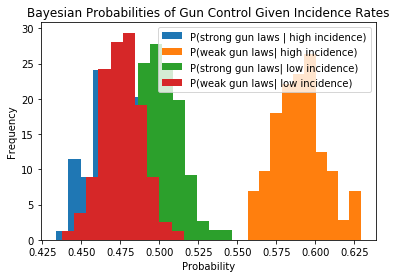

In [15]:
x_labels = ['P(strong gun laws | high incidence)', 'P(weak gun laws| high incidence)', 'P(strong gun laws| low incidence)', 'P(weak gun laws| low incidence)']
probs = [strong_given_high, weak_given_high, strong_given_low, weak_given_low]

for lab, prob in zip(x_labels, probs):
    plt.hist(prob, density=True, bins=10, label=lab)
    plt.ylabel('Frequency');
    plt.xlabel('Probability')
    plt.title('Bayesian Probabilities of Gun Control Given Incidence Rates')
    plt.legend()